# 地震台站

- 本节贡献者: {{田冬冬}}（作者）、{{姚家园}}（审稿）
- 最近更新日期: 2023-04-29
- 预计花费时间: 60 分钟

---

全球地震台站有成千上万个，通常在某个具体研究中只需要符合特定要求的台站，因而需要对地震台站进行筛选。
这一节介绍如何筛选公开地震台站并获取台站信息。

## 使用 IRIS GMAP 筛选台站

```{note}
IRIS GMAP 使用了 Google 地图服务，因而需要科学上网才能正常访问。
```

IRIS GMAP 是一个由 IRIS 提供的地震台站网页搜索工具，可以方便地查看全球地震台站分布以及台站的
详细信息。下面演示 IRIS GMAP 的基本使用方法。

访问 IRIS GMAP 网站 [https://ds.iris.edu/gmap/](https://ds.iris.edu/gmap/)，
会看到如下界面：界面左侧为功能栏，可以使用不同的准则筛选地震台站；
右侧为显示区，用于显示符合筛选条件的地震台站。

左侧功能栏中，支持以多种不同的方式对地震台站进行筛选：指定台网名、台站名、位置码、通道名；指定时间范围；指定台站位置范围（矩形区域或圆形区域）；指定地震数据中心。

:::{figure} gmap-1.jpg
:align: center
:alt: "IRIS GMAP 界面"
:width: 90%

IRIS GMAP 界面
:::

例如，想筛选所有 `IU` 台网的宽频带地震台站，则可以在 **Network** 框中输入 `IU`，
在 **Channel** 框中输入 `BH?`（此处的问号为通配符），然后点击上方的 **Update Map**
按钮，界面右侧便会显示出所有满足筛选条件的台站。右侧上方为地图区域，圆圈标记了
台站的位置；下方为列表区域，会显示台网名、台站名、台站位置以及台站的开始和结束时间。

:::{figure} gmap-2.jpg
:align: center
:alt: "IRIS GMAP 显示 IU 台网的宽频带台站"
:width: 90%

IRIS GMAP 显示 IU 台网的宽频带台站
:::

可以更进一步查看每个台站的详细信息。以位于美国新墨西哥州的地震台站 `IU.ANMO` 为例，
点击 `IU.ANMO` 台站对应的圆圈或下方列表区域的该台，会出现如下图所示的提示框：

:::{figure} gmap-3.jpg
:align: center
:alt: "IRIS GMAP 查看 IU.ANMO 台站的基本信息"
:width: 90%

IRIS GMAP 查看 IU.ANMO 台站的基本信息
:::
可以看到，`IU.ANMO` 台站位于美国新墨西哥州 Albuquerque 市，台站开始运行的时间为 
2002 年 11 月 19 日，结束运行的时间为 2599 年 12 月 31 日（这一“未来”结束时间
表示台站依然在长期运行中）。

点击提示框中的 “More Information”链接，则会跳转到 [IRIS MDA](https://ds.iris.edu/mda) 中
该台站所对应的页面（即 https://ds.iris.edu/mda/IU/ANMO/?starttime=2002-11-19&endtime=2599-12-31)。
该页面不仅列出了台站的基本信息，还列出了台站所使用的地震仪器及其基本参数。

:::{figure} mda-1.jpg
:align: center
:alt: "IRIS MDA 中查看 IU.ANMO 台站的基本信息"
:width: 90%

IRIS MDA 中查看 IU.ANMO 台站的基本信息
:::

## 使用 ObsPy 下载地震台站信息

IRIS GMAP 作为一个在线工具可以很直观地查看台站分布和基本信息，但却不适合数据
自动化处理。ObsPy 提供了从不同的地震数据中心筛选和下载台站基本信息的功能。

下面演示如何使用 ObsPy 的 {meth}`Client.get_stations() <obspy.clients.fdsn.client.Client.get_stations()>`
函数筛选和下载地震台站信息。

首先，需要导入 ObsPy 中地震数据中心数据下载客户端 {class}`~obspy.clients.fdsn.client.Client`：

In [1]:
from obspy.clients.fdsn import Client

接下来，我们需要初始化一个 {class}`~obspy.clients.fdsn.client.Client` 对象。
ObsPy 的 `Client` 支持多个地震数据中心。这里我们选择使用 IRIS 地震数据中心：

In [2]:
client = Client("IRIS")

{meth}`Client.get_stations() <obspy.clients.fdsn.client.Client.get_stations()>`
函数可以根据指定的参数获取地震台站信息。这里我们想要获得 `IU` 台网中所有台站名以 `A` 开头的
宽频带三分量（`BH*`）台站，并同时获取台站的仪器响应信息（`level="response"`）：

In [3]:
inv = client.get_stations(
    network="IU", 
    station="A*",
    channel="BH*",
    starttime="2002-01-01",
    endtime="2002-01-02",
    level="response"
)

该函数会向 IRIS 地震数据中心发起请求，并返回符合条件的地震台站信息。其返回值是
{class}`~obspy.core.inventory.inventory.Inventory` 类型，并被保存到变量 `inv` 中。
下面我们看看变量 `inv` 中的内容：

In [4]:
print(inv)

Inventory created at 2024-04-21T01:15:45.836400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2002-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IU
		Stations (3):
			IU.ADK (Adak, Aleutian Islands, Alaska)
			IU.AFI (Afiamalu, Samoa)
			IU.ANMO (Albuquerque, New Mexico, USA)
		Channels (15):
			IU.ADK.00.BHZ, IU.ADK.00.BHN, IU.ADK.00.BHE, IU.AFI.00.BHZ, 
			IU.AFI.00.BHN, IU.AFI.00.BHE, IU.AFI.10.BHZ, IU.AFI.10.BHN, 
			IU.AFI.10.BHE, IU.ANMO.00.BHZ, IU.ANMO.00.BH1, IU.ANMO.00.BH2, 
			IU.ANMO.10.BHZ, IU.ANMO.10.BH1, IU.ANMO.10.BH2


可以看到，返回的变量 `inv` 中包含了满足条件的 1 个台网、3 个台站、15 个通道的信息。

{class}`~obspy.core.inventory.inventory.Inventory` 类提供的
{meth}`Inventory.plot() <obspy.core.inventory.inventory.Inventory.plot>` 函数
可以用于快速绘制地震台站分布图：

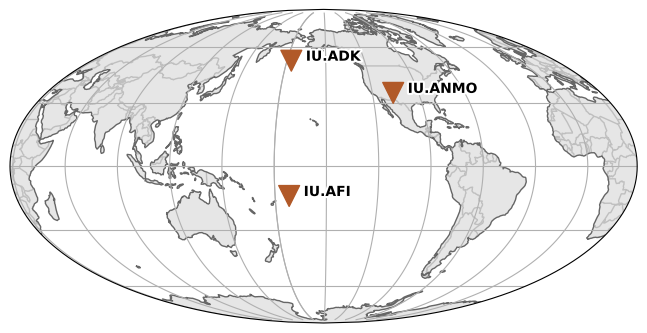

In [5]:
inv.plot();

{meth}`Inventory.plot_response() <obspy.core.inventory.inventory.Inventory.plot_response>` 
函数可以用于绘制仪器响应。下面的函数绘制了 `inv` 中所有 `BHZ` 分量的仪器响应，并设置了仪器响应图的
最小频率为 0.001 Hz：

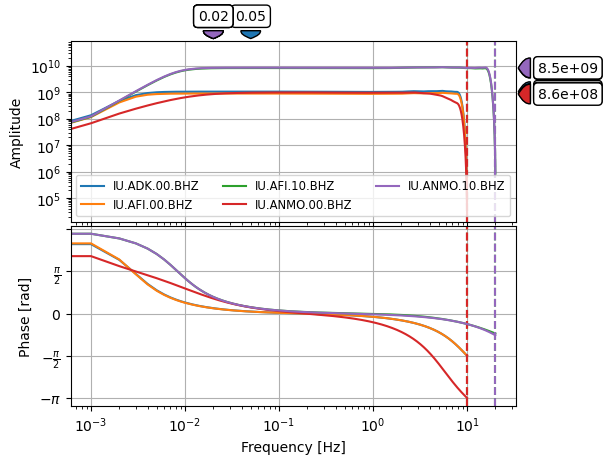

In [6]:
inv.plot_response(min_freq=0.001, channel="BHZ");

## 台站信息的读和写

通过 {meth}`Client.get_stations() <obspy.clients.fdsn.client.Client.get_stations()>`
获得的台站信息可以保存为多种不同格式。下面的代码将台站信息以 StationXML 格式保存到文件 
`stations.xml` 中：

In [7]:
inv.write("stations.xml", format="STATIONXML")

在需要时，随时可以使用 {func}`read_inventory() <obspy.core.inventory.inventory.read_inventory>` 
函数读入磁盘文件中的台站信息。该函数值返回 {class}`~obspy.core.inventory.inventory.Inventory` 类型：

In [8]:
from obspy import read_inventory
inv = read_inventory("stations.xml")

## 深入理解和使用 {class}`~obspy.core.inventory.inventory.Inventory` 类

上面提到，{meth}`Client.get_stations() <obspy.clients.fdsn.client.Client.get_stations()>`
和 {func}`read_inventory() <obspy.core.inventory.inventory.read_inventory>` 的返回值都是 
{class}`~obspy.core.inventory.inventory.Inventory` 类型。
事实上，{class}`~obspy.core.inventory.inventory.Inventory` 类是 ObsPy 中最核心的类之一，用于储存地震台站信息。
下图展示了 {class}`~obspy.core.inventory.inventory.Inventory` 类的属性及其层级关系：
{class}`~obspy.core.inventory.inventory.Inventory` 类可以看做是 
{class}`~obspy.core.inventory.network.Network` 类的列表;
{class}`~obspy.core.inventory.network.Network` 类可以看做是 
{class}`~obspy.core.inventory.station.Station` 类的列表;
{class}`~obspy.core.inventory.station.Station` 类可以看做是 
{class}`~obspy.core.inventory.channel.Channel` 类的列表。

:::{figure} https://docs.obspy.org/_images/Inventory.png
:align: center
:alt: "ObsPy 的 Inventory 类"
:width: 100%

ObsPy 的 {class}`~obspy.core.inventory.inventory.Inventory` 类。引自 [ObsPy 网站](https://docs.obspy.org/_images/Inventory.png)。
:::

### {class}`~obspy.core.inventory.inventory.Inventory` 类

可以对 {class}`~obspy.core.inventory.inventory.Inventory` 进行列表相关的操作，
下面对 `inv` 进行循环并打印每个元素（即 `Network` 类）的值：

In [9]:
for net in inv:
    print(net)

Network IU (Global Seismograph Network - IRIS/USGS (GSN))
	Station Count: 3/128 (Selected/Total)
	1988-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (3):
			IU.ADK (Adak, Aleutian Islands, Alaska)
			IU.AFI (Afiamalu, Samoa)
			IU.ANMO (Albuquerque, New Mexico, USA)
		Channels (15):
			IU.ADK.00.BHZ, IU.ADK.00.BHN, IU.ADK.00.BHE, IU.AFI.00.BHZ, 
			IU.AFI.00.BHN, IU.AFI.00.BHE, IU.AFI.10.BHZ, IU.AFI.10.BHN, 
			IU.AFI.10.BHE, IU.ANMO.00.BHZ, IU.ANMO.00.BH1, IU.ANMO.00.BH2, 
			IU.ANMO.10.BHZ, IU.ANMO.10.BH1, IU.ANMO.10.BH2


### {class}`~obspy.core.inventory.network.Network` 类

{class}`~obspy.core.inventory.network.Network` 类提供了很多台网相关的属性和函数。
例如，下面的代码会输出第一个台网的代码、总台站数以及 `inv` 中实际包含的台站数目：

In [10]:
net = inv[0]
print(net.code, net.total_number_of_stations, net.selected_number_of_stations)

IU 128 3


可以对 {class}`~obspy.core.inventory.network.Network` 进行列表相关的操作，
这里我们取其第一个台站并查看其信息：

In [11]:
sta = net[0]
print(sta)

Station ADK (Adak, Aleutian Islands, Alaska)
	Station Code: ADK
	Channel Count: 3/103 (Selected/Total)
	1993-09-21T00:00:00.000000Z - 2009-02-14T00:00:00.000000Z
	Access: open 
	Latitude: 51.8823, Longitude: -176.6842, Elevation: 130.0 m
	Available Channels:
	  .00.BH[ZNE]    20.0 Hz  1999-02-11 to 2003-05-23



### {class}`~obspy.core.inventory.station.Station` 类

{class}`~obspy.core.inventory.station.Station` 类也提供了很多台站相关的属性和函数。
例如，下面的代码输出了当前台站的台站代码、经纬度、高程、台站的总通道数目和当前 `inv` 中包含的
通道数目：

In [12]:
print(sta.code, sta.latitude, sta.longitude, sta.elevation)
print(sta.total_number_of_channels, sta.selected_number_of_channels)

ADK 51.8823 -176.6842 130.0
103 3


可以对 {class}`~obspy.core.inventory.station.Station` 进行列表相关的操作，
这里我们取该台站的第一个通道并查看其信息：

In [13]:
chn = sta[0]
print(chn)

Channel 'BHE', Location '00' 
	Time range: 1999-02-11T00:00:00.000000Z - 2003-05-23T08:40:00.000000Z
	Latitude: 51.8823, Longitude: -176.6842, Elevation: 130.0 m, Local Depth: 0.0 m
	Azimuth: 90.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): None (Streckeisen STS-1H/VBB Seismometer)
	Response information available


### {class}`~obspy.core.inventory.channel.Channel` 类

{class}`~obspy.core.inventory.channel.Channel` 类也提供了很多通道相关的属性和函数。
例如，下面的代码输出了当前通道的方位角、倾角、位置码和采样率等信息：

In [14]:
print(chn.azimuth, chn.dip, chn.location_code, chn.sample_rate)

90.0 0.0 00 20.0
